In [2]:
import pandas as pd


In [3]:
data_url = "https://raw.githubusercontent.com/amcquistan/WeatherPredictPythonML/master/end-part2_df.csv"
df = pd.read_csv(data_url).set_index('date')


In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

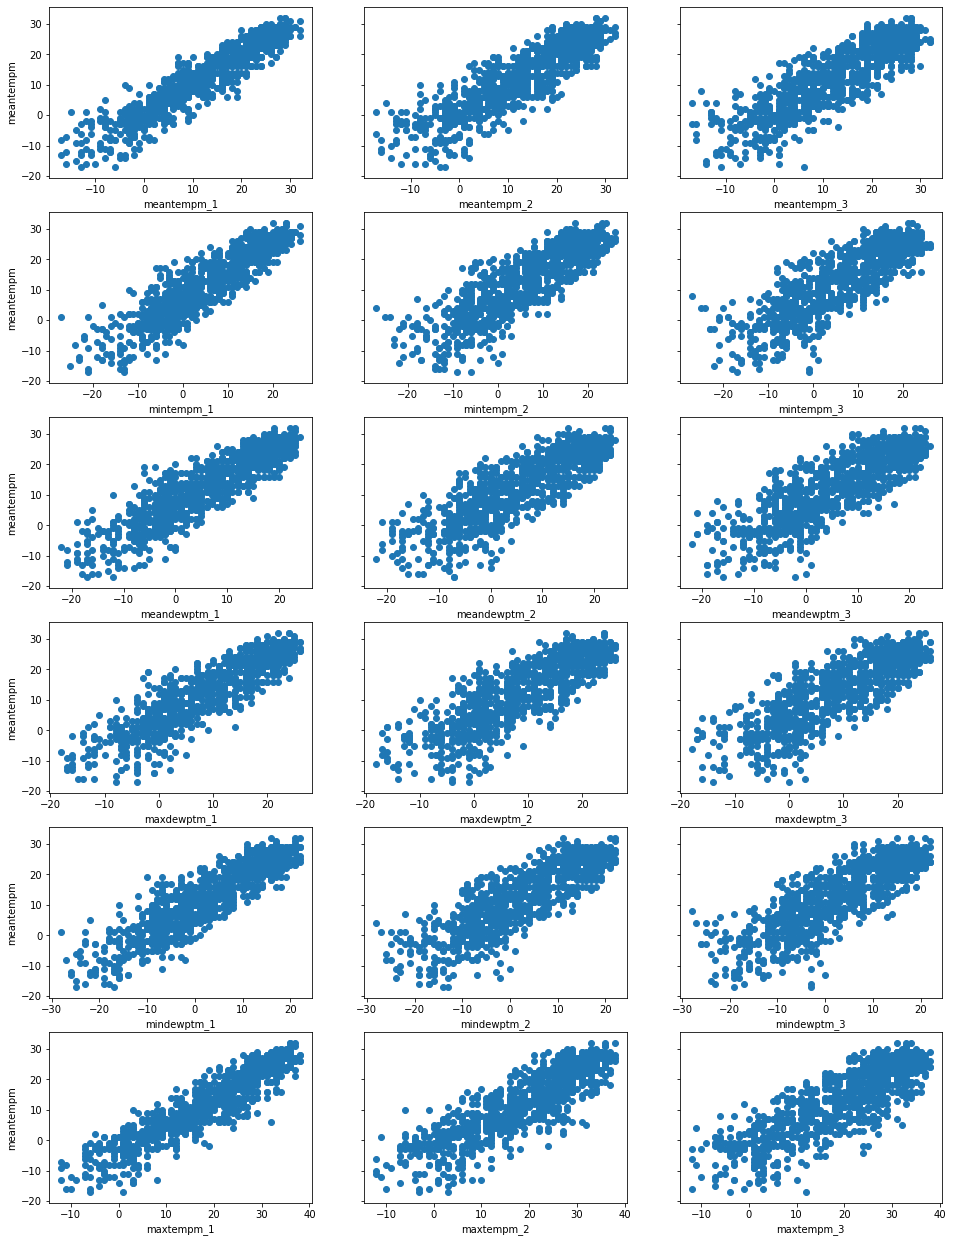

In [7]:
%matplotlib inline


predictors = ['meantempm_1',  'meantempm_2',  'meantempm_3', 
              'mintempm_1',   'mintempm_2',   'mintempm_3',
              'meandewptm_1', 'meandewptm_2', 'meandewptm_3',
              'maxdewptm_1',  'maxdewptm_2',  'maxdewptm_3',
              'mindewptm_1',  'mindewptm_2',  'mindewptm_3',
              'maxtempm_1',   'maxtempm_2',   'maxtempm_3']
df2 = df[['meantempm'] + predictors]

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [16, 22]

# call subplots specifying the grid structure we desire and that 
# the y axes should be shared
fig, axes = plt.subplots(nrows=6, ncols=3, sharey=True)

# Since it would be nice to loop through the features in to build this plot
# let us rearrange our data into a 2D array of 6 rows and 3 columns
arr = np.array(predictors).reshape(6, 3)

# use enumerate to loop over the arr 2D array of rows and columns
# and create scatter plots of each meantempm vs each feature
for row, col_arr in enumerate(arr):
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df2[feature], df2['meantempm'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='meantempm')
        else:
            axes[row, col].set(xlabel=feature)
plt.show()

In [12]:
X = df2[predictors]
y = df2['meantempm']



In [14]:
from sklearn.model_selection import train_test_split
# first remove the const column because unlike statsmodels, SciKit-Learn will add that in for us

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [15]:
from sklearn.linear_model import LinearRegression
# instantiate the regressor class
regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction))

The Explained Variance: 0.90
The Mean Absolute Error: 2.72 degrees celsius
The Median Absolute Error: 2.18 degrees celsius


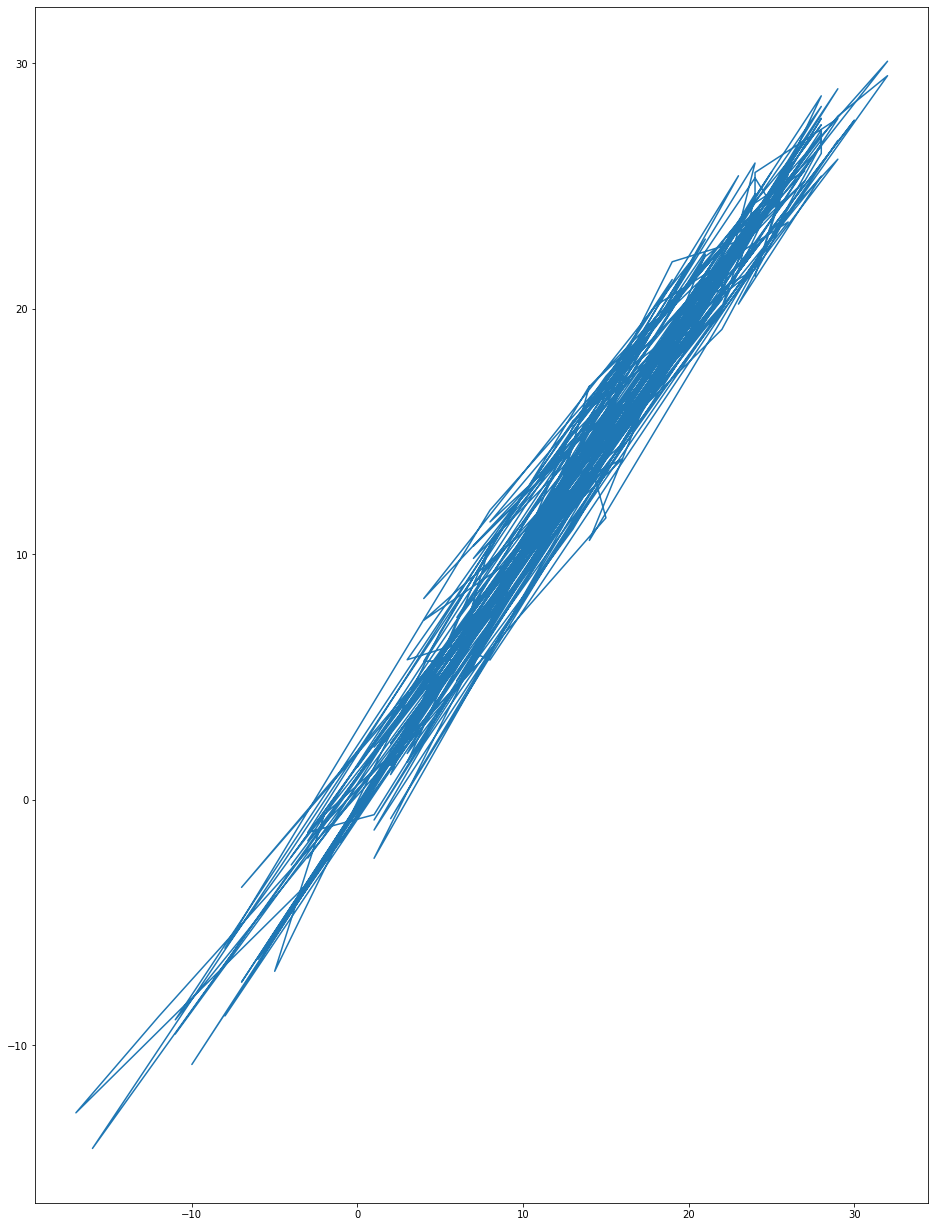

In [20]:
#X_test["meantempm_1"]
